```
Author Name : SYED LATEEFUDDIN  
SR Number   : 22412  
Program     : M.Tech - Artificial Intelligence
course      : E9 241 Digital Image Processing
DIP Assignment-1
```



### Import Libraries & Load Images

In [45]:
from skimage import io, color, filters
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import gdown
import os
import time


In [46]:
base_path = "images"
os.makedirs(base_path, exist_ok=True)

link = "https://drive.google.com/uc?id=1XWqexoM0_fG0_4phWsUO_UUK1R8OpqYw"
path = os.path.join(base_path, "images.zip")
gdown.download(link, path, quiet=True)
!unzip -o -q "$path" -d "$(dirname "$path")"

coins = io.imread('./images/coins.png')
sudoku = io.imread('./images/sudoku.png')
quote = io.imread('./images/quote.png')



## Question-1

**Histogram Computation:**


Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (203, 248)
Maximum pixel value  : 255
Minimum pixel value  : 11


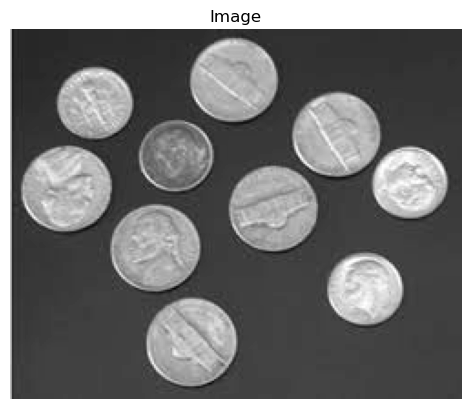

In [52]:
# Verify image information
image = coins

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

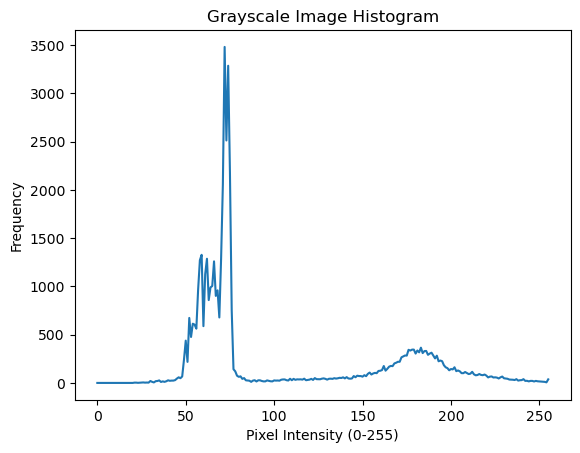


Average Intensity (using Histogram) : 103.30500

Average Intensity (Actual)          : 103.30500


In [54]:
def histogram(image_gray):
    histogram = np.zeros(256, int)
    for pixel_value in image_gray.ravel():
        histogram[pixel_value] += 1
    return histogram

def calculate_average_intensity(histogram):
    total_pixels = histogram.sum()
    intensity_values = np.arange(256)  #[0, 1, 2, ..., 255]
    average_intensity = (intensity_values * histogram).sum() / total_pixels
    return average_intensity

image = coins

hist = histogram(image)
average_intensity = calculate_average_intensity(hist)
actual_average_intensity = np.mean(image)

# Plotting the histogram
plt.plot(range(256), hist)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.show()

print(f'\nAverage Intensity (using Histogram) : {average_intensity:.5f}')
print(f'\nAverage Intensity (Actual)          : {actual_average_intensity:.5f}')

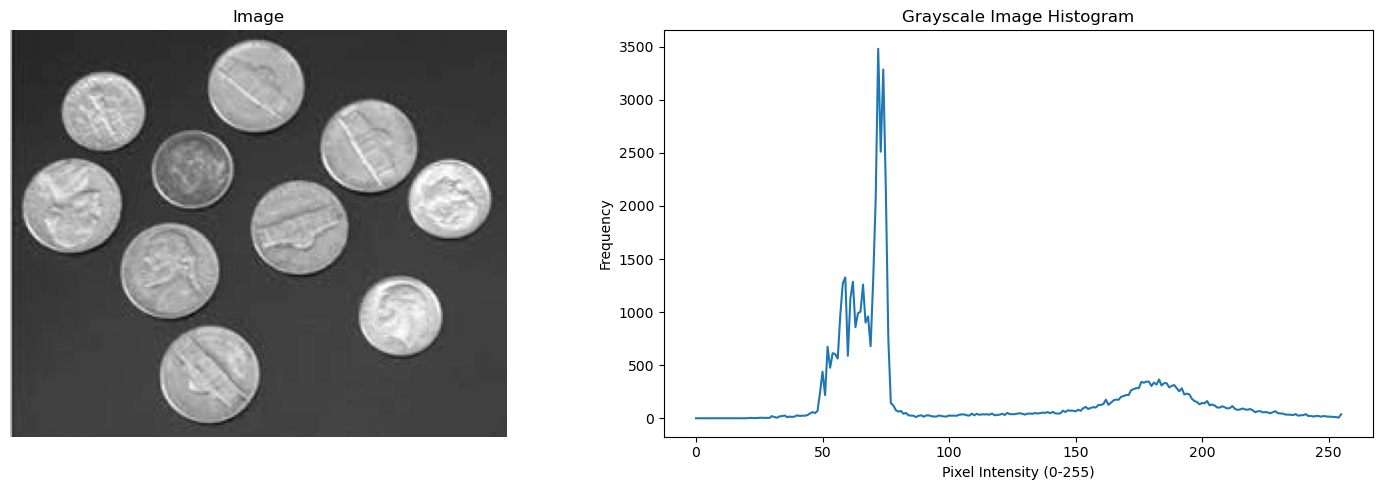

In [50]:


# Display the image and Histogram
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(122)
plt.plot(range(256), hist)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Question-2

**Otsu’s Binarization:**


Time taken for Within Class Variance: 4.04593 seconds
Time taken for Between Class Variance : 3.60862 seconds

Minima of Within Class Variance threshold value = 125

Maxima of Between Class Variance threshold value = 125

skimage in-built function threshold value for otsu binarization = 125



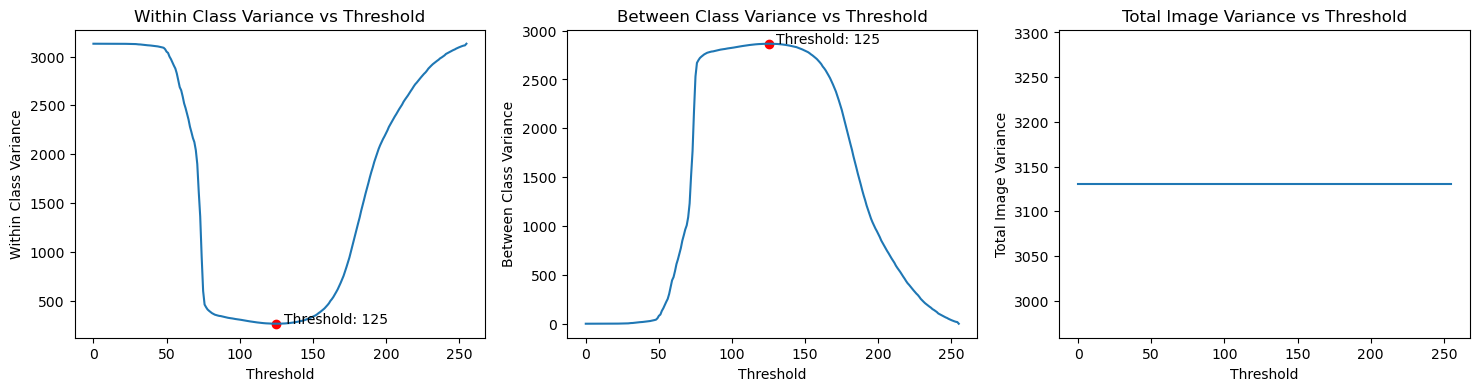

In [55]:

def probability(m, n, hist):
    num_pixels = hist[m:n].sum()
    total_pixels = hist.sum()
    return num_pixels / total_pixels

def mean(m, n, hist):
    num_pixels = hist[m:n].sum()
    sum_intensity = (hist[m:n] * np.arange(m, n)).sum()
    return sum_intensity / num_pixels if num_pixels != 0 else 0

def variance(m, n, hist):
    mu = mean(m, n, hist)
    return (((np.arange(m, n) - mu)**2) * hist[m:n]).sum() / hist[m:n].sum() if hist[m:n].sum() != 0 else 0

def within_class_variance(image_gray, t):
    hist = histogram(image_gray)
    prob_black = probability(0, t+1, hist)
    prob_white = probability(t+1, 256, hist)
    var_black = variance(0, t+1, hist)
    var_white = variance(t+1, 256, hist)
    return (var_black * prob_black) + (var_white * prob_white)

def between_class_variance(image_gray, t):
    hist = histogram(image_gray)
    prob_black = probability(0, t+1, hist)
    prob_white = probability(t+1, 256, hist)
    mean_black = mean(0, t+1, hist)
    mean_white = mean(t+1, 256, hist)
    total_mean = mean_black * prob_black + mean_white * prob_white
    return ((mean_black - total_mean)**2) * prob_black + ((mean_white - total_mean)**2) * prob_white

image = coins

start1 = time.time()
within_class_var = np.array([within_class_variance(image, i) for i in range(256)])
end1 = time.time()

start2 = time.time()
between_class_var = np.array([between_class_variance(image, i) for i in range(256)])
end2 = time.time()

total_image_var = within_class_var + between_class_var


print(f'Time taken for Within Class Variance: {(end1 - start1):.5f} seconds')

print(f'Time taken for Between Class Variance : {(end2 - start2):.5f} seconds')

# Calculate minima for within-class variance
min_within_class_var = within_class_var.min()
min_within_class_var_t = within_class_var.argmin()

# Calculate maxima for between-class variance
max_between_class_var = between_class_var.max()
max_between_class_var_t = between_class_var.argmax()


otsu_threshold = filters.threshold_otsu(image)
print(f'\nMinima of Within Class Variance threshold value = {min_within_class_var_t}')
print(f'\nMaxima of Between Class Variance threshold value = {max_between_class_var_t}')
print(f'\nskimage in-built function threshold value for otsu binarization = {otsu_threshold}\n')


# Plotting
plt.figure(figsize=(18, 4))

# Within-Class Variance Plot
plt.subplot(131)
plt.plot(range(256), within_class_var, label='Within Class Variance')
plt.scatter(min_within_class_var_t, min_within_class_var, color='red')  # Mark the minima
plt.annotate(f'Threshold: {min_within_class_var_t}', xy=(min_within_class_var_t, min_within_class_var), xytext=(min_within_class_var_t + 5, min_within_class_var + 0.02))
plt.title('Within Class Variance vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Within Class Variance')

# Between-Class Variance Plot
plt.subplot(132)
plt.plot(range(256), between_class_var, label='Between Class Variance')
plt.scatter(max_between_class_var_t, max_between_class_var, color='red')  # Mark the maxima
plt.annotate(f'Threshold: {max_between_class_var_t}', xy=(max_between_class_var_t, max_between_class_var), xytext=(max_between_class_var_t + 5, max_between_class_var + 0.02))
plt.title('Between Class Variance vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Between Class Variance')

# Total Image Variance Plot
plt.subplot(133)
plt.plot(range(256), total_image_var, label='Total Image Variance')
plt.title('Total Image Variance vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Total Image Variance')

plt.show()


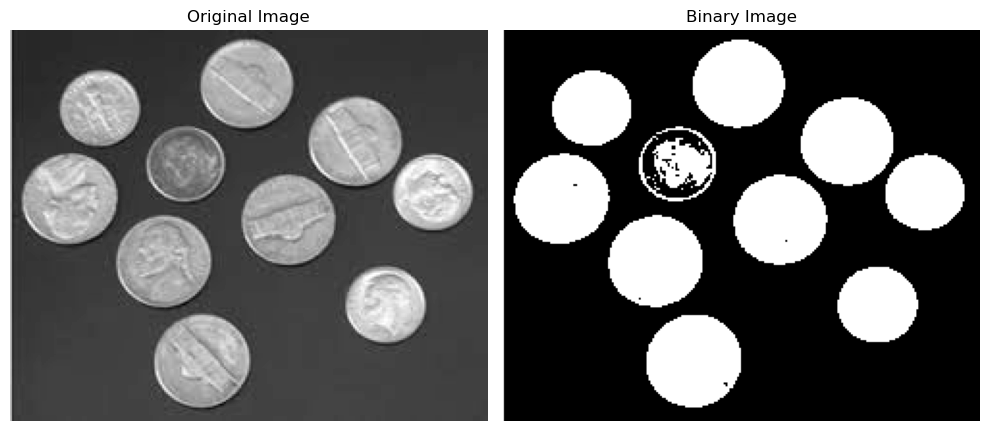

In [37]:
def otsu_binarization(image_gray):
    between_class_var = np.array([between_class_variance(image_gray, i) for i in range(256)])
    threshold = between_class_var.argmax()
    binarized_image = (image_gray > threshold) * 255
    return binarized_image.astype(np.uint8)

image = coins
binary_image = otsu_binarization(image)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Question-3

**Adaptive Binarization:**

Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (512, 512)
Maximum pixel value  : 218
Minimum pixel value  : 8


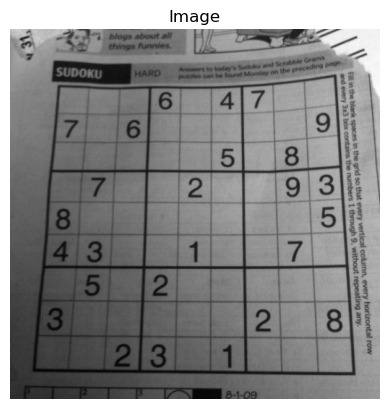

In [38]:
# Verify image information
image = sudoku

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

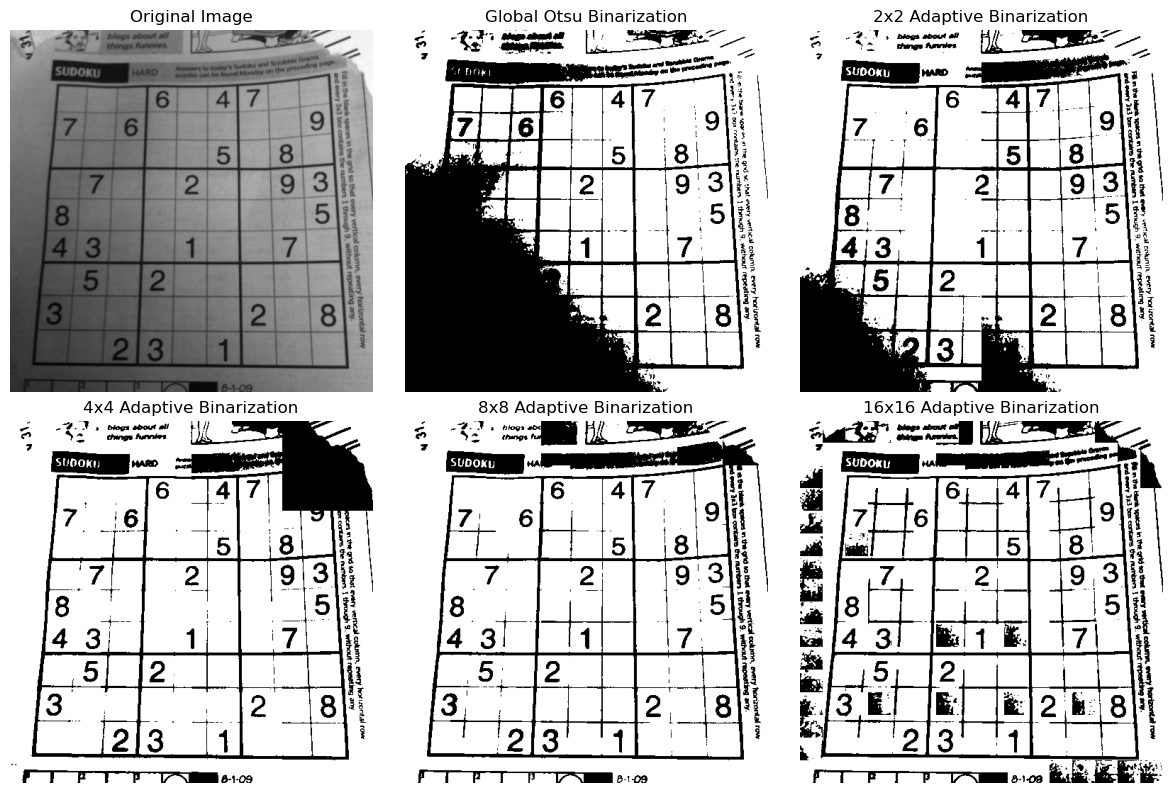

In [56]:

def adaptive_binarization(image, N):
    height, width = image.shape
    block_height = height // N
    block_width = width // N
    binarized_image = np.zeros_like(image, int)
    for i in range(0, height, block_height):
        for j in range(0, width, block_width):
            end_i = min(i + block_height, height)
            end_j = min(j + block_width, width)
            block = image[i:end_i, j:end_j]
            binarized_block = otsu_binarization(block)
            binarized_image[i:end_i, j:end_j] = binarized_block
    return binarized_image

image = sudoku

# Apply Global Otsu Binarization
binarized_global = otsu_binarization(image)

# Apply adaptive binarization with different block sizes
binarized_2x2 = adaptive_binarization(image, 2)
binarized_4x4 = adaptive_binarization(image, 4)
binarized_8x8 = adaptive_binarization(image, 8)
binarized_16x16 = adaptive_binarization(image, 16)

# Plot the results for comparison
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(232)
plt.title("Global Otsu Binarization")
plt.imshow(binarized_global, cmap='gray')
plt.axis('off')

plt.subplot(233)
plt.title("2x2 Adaptive Binarization")
plt.imshow(binarized_2x2, cmap='gray')
plt.axis('off')

plt.subplot(234)
plt.title("4x4 Adaptive Binarization")
plt.imshow(binarized_4x4, cmap='gray')
plt.axis('off')

plt.subplot(235)
plt.title("8x8 Adaptive Binarization")
plt.imshow(binarized_8x8, cmap='gray')
plt.axis('off')

plt.subplot(236)
plt.title("16x16 Adaptive Binarization")
plt.imshow(binarized_16x16, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Question-4

**Connected Components:**

Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (610, 674)
Maximum pixel value  : 255
Minimum pixel value  : 0


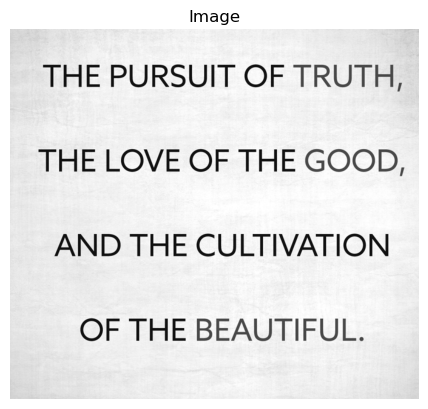

In [41]:
# Verify image information
image = quote

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

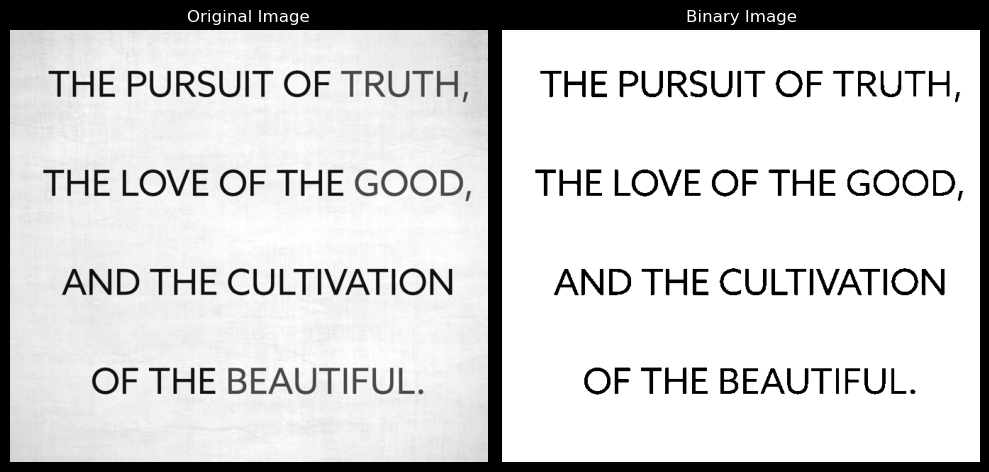

In [42]:
image = quote
binary_image = otsu_binarization(image)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image', color='white')
plt.axis('off')
plt.gca().set_facecolor('black')

plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image', color='white')
plt.axis('off')
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.gcf().patch.set_facecolor('black')
plt.show()

In [57]:

def count_characters(binary_image, min_size=100):
    binary_image = (binary_image / np.max(binary_image)).astype(int)
    binary_image = (1 - binary_image).astype(int) #black_bg, white_fg
    I, J = binary_image.shape
    K = 0
    component_image = np.zeros_like(binary_image, int)
    equivalence_table = {}
    for i in range(I):
        for j in range(J):
            if binary_image[i, j] == 1:
                neighbors = []
                if i > 0:
                    neighbors.append(component_image[i-1, j])  # North
                    if j > 0:
                        neighbors.append(component_image[i-1, j-1])  # North-West
                    if j < J-1:
                        neighbors.append(component_image[i-1, j+1])  # North-East
                if j > 0:
                    neighbors.append(component_image[i, j-1])  # West
                neighbors = [label for label in neighbors if label > 0]
                if len(neighbors) == 0:
                    K += 1
                    component_image[i, j] = K
                    equivalence_table[K] = K
                else:
                    min_label = min(neighbors)
                    component_image[i, j] = min_label
                    for label in neighbors:
                        if label != min_label:
                            for key in equivalence_table.keys():
                                if equivalence_table[key] == label:
                                    equivalence_table[key] = min_label
    label_map = np.array([equivalence_table.get(i, 0) for i in range(K + 1)])
    component_image = label_map[component_image]

    # Count unique components and filter by size
    unique_labels, counts = np.unique(component_image[component_image > 0], return_counts=True)
    large_components = unique_labels[counts >= min_size]

    return len(large_components), np.sort(counts)

num_characters, comp_size = count_characters(binary_image)

print(f"Number of Characters (excluding punctuations): {num_characters}\n")


Number of Characters (excluding punctuations): 64



In [58]:
comp_size

array([ 35,  55,  57, 144, 184, 184, 184, 212, 246, 252, 272, 273, 276,
       276, 280, 280, 280, 285, 285, 305, 305, 307, 312, 342, 342, 361,
       364, 365, 367, 373, 387, 389, 389, 389, 397, 399, 399, 399, 399,
       405, 411, 411, 413, 416, 416, 416, 417, 431, 436, 444, 449, 449,
       449, 468, 468, 468, 471, 486, 488, 496, 496, 497, 497, 498, 499,
       541, 546])

Note: first three components has very small size compared to the rest of components, they have to be punctuations, hence min_size is chosen as 100 pixels to filter out the punctuations from connected components.